## BBC

In [43]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import seaborn as sns
import os

In [44]:

df= pd.read_csv('bbc.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


## Preprocessing

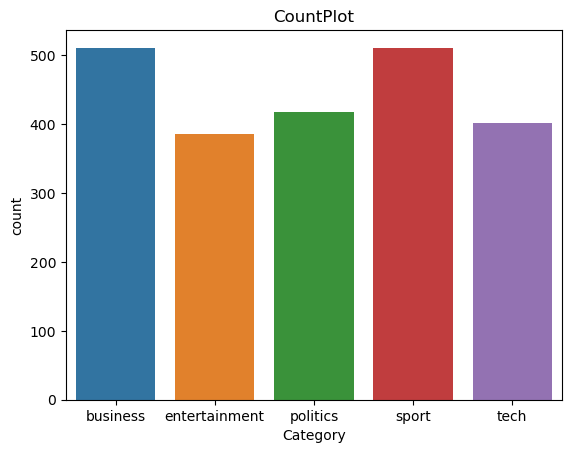

In [46]:
# Convert 'category' column to categorical data type
df['category'] = pd.Categorical(df['category'])

# Plot the count
sns.countplot(data=df, x='category')
plt.xlabel('Category')
plt.title('CountPlot')
plt.show()

In [47]:
# Transform the 'text' column to lowercase

df['text'] = df['text'].str.lower()


#removing stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stopwords)]))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
df

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raids box office ocean twelve cri...
...,...,...
2220,business,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem a...
2223,politics,political squabbles snowball become commonplac...


In [49]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)


##  Feature Extraction( TF-IDF )

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = vectorizer.fit_transform(df['text'])

In [52]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tfidf,df['category'],random_state=0,test_size=0.25)

from sklearn import svm
# Create an instance of the SVM classifier
svm_classifier = svm.SVC(C=1.0, kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(x_train, y_train)

# Predict the class labels for the test data
predicted_labels = svm_classifier.predict(x_test)


In [53]:
# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score

print("SVM Accuracy Score -> ",accuracy_score(predicted_labels, y_test)*100)

SVM Accuracy Score ->  98.74326750448833


In [54]:
from sklearn.metrics import classification_report
# Calculate precision, recall, and F-measure
report = classification_report(y_test, predicted_labels)
print(report)

               precision    recall  f1-score   support

     business       0.99      0.98      0.99       126
entertainment       0.97      0.99      0.98        95
     politics       0.99      0.97      0.98        94
        sport       1.00      1.00      1.00       147
         tech       0.98      0.99      0.98        95

     accuracy                           0.99       557
    macro avg       0.99      0.99      0.99       557
 weighted avg       0.99      0.99      0.99       557



## 20 Newsgroup 


In [55]:
import os
import pandas as pd
folders=sorted(os.listdir(os.path.join('C:/Users/lenovo/Desktop/20'))) 

data = []

for folder in folders:
    for file in os.listdir(os.path.join('20', folder)):
        with open(os.path.join('20', folder, file), encoding='latin-1') as opened_file:
            data.append({'folder': folder, 'document': opened_file.read()})
df = pd.DataFrame(data)
df

,folder,document
0,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:...
1,comp.graphics,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
2,comp.graphics,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,comp.graphics,Xref: cantaloupe.srv.cs.cmu.edu comp.human-fac...
4,comp.graphics,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
...,...,...
4992,talk.politics.guns,Xref: cantaloupe.srv.cs.cmu.edu alt.politics.u...
4993,talk.politics.guns,Newsgroups: talk.politics.guns\nPath: cantalou...
4994,talk.politics.guns,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
4995,talk.politics.guns,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...


## Preprocessing

In [56]:
import re

def remove_headers(text):
    header_end = text.find('\n\n')
    if header_end != -1:
        text = text[header_end:]

    text = re.sub(r'\S+@\S+', '', text)

    return text

df['document'] = df['document'].apply(remove_headers)


In [57]:
df['document'] = df['document'].apply(lambda x: x.lower())
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stopwords from the 'document' column
df['document'] = df['document'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## ##  Feature Extraction( TF-IDF )

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF transformation to the 'document' column
tfidf = vectorizer.fit_transform(df['document'])



In [59]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tfidf,df['folder'],random_state=0,test_size=0.25)

from sklearn import svm
# Create an instance of the SVM classifier
svm_classifier = svm.SVC(C=1.0, kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(x_train, y_train)

# Predict the class labels for the test data
predicted_labels = svm_classifier.predict(x_test)


In [60]:
# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score

print("SVM Accuracy Score -> ",accuracy_score(predicted_labels, y_test)*100)

SVM Accuracy Score ->  96.96000000000001


In [61]:
from sklearn.metrics import classification_report
# Calculate precision, recall, and F-measure
report = classification_report(y_test, predicted_labels)
print(report)

                        precision    recall  f1-score   support

         comp.graphics       0.94      0.98      0.96       245
          misc.forsale       0.94      0.97      0.95       257
    rec.sport.baseball       1.00      0.97      0.98       250
soc.religion.christian       0.99      0.95      0.97       242
    talk.politics.guns       0.99      0.97      0.98       256

              accuracy                           0.97      1250
             macro avg       0.97      0.97      0.97      1250
          weighted avg       0.97      0.97      0.97      1250

